In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, precision_recall_curve

In [109]:
# Define data
x = np.array([0.1, 0, 0.2, 0, 0.1, 2, 2.2, 1, 2, 2, 2, 0.3, 0.2, 0.1, 3, 2.5, 2.2, 1, 1.1, 0])
y = np.array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])
x_test = np.array([0.5, 0.1, 3, 2.5, 0, 0.1, 0.4, 2, 1.8, 0.3, 0.5, 0.9, 1, 1.5, 2, 1.8, 1.1, 0, 0.2, 0.5])
y_test = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [110]:
# Build model
logreg = LogisticRegression()
model = logreg.fit(x.reshape(-1,1), y)
pred = logreg.predict(x.reshape(-1,1))

In [111]:
# Confusion matrix
conmat = confusion_matrix(y, pred, labels = [0,1])

In [113]:
# Predicted scores for precision-recall curve
pred_score = model.decision_function(x_test.reshape(-1,1))
precision, recall, thresholds = precision_recall_curve(y_test, pred_score)

In [114]:
# Dataframe for confusion matrix
conmat_df = pd.DataFrame(conmat, index=['Actually Positive', 'Actually Negative'], columns=['Predicted Positive', 'Predicted Negative'])
print(conmat_df)

                   Predicted Positive  Predicted Negative
Actually Positive                  10                   2
Actually Negative                   2                   6


In [115]:
pred_train = logreg.predict(x.reshape(-1,1))

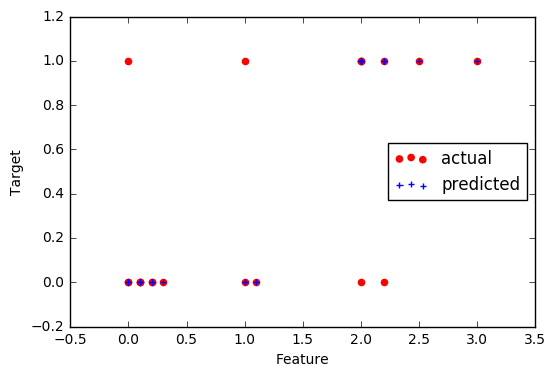

In [116]:
# Actual and predcted, vs feature
plt.xlabel("Feature")
plt.ylabel("Target")
plot1 = plt.scatter(x, y, color="red", label = "actual", marker = 'o')
plot2 = plt.scatter(x, pred_train, color="blue", label = "predicted", marker = '+')
plt.legend(handles=[plot1, plot2], loc = 5)

plt.show()

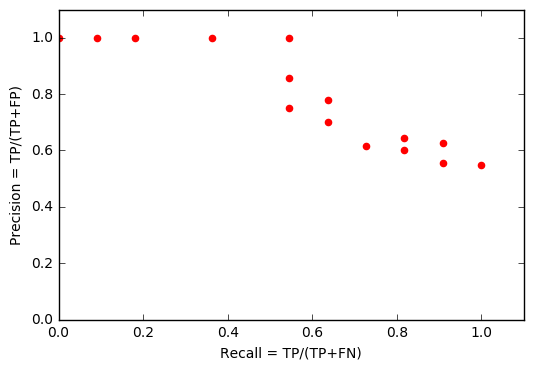

In [117]:
plt.scatter(recall, precision, color="red")
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xlabel("Recall = TP/(TP+FN)")
plt.ylabel("Precision = TP/(TP+FP)")
plt.show()